In [1]:
#pip install plotter
#pip install transformations
from plotter import Plotter
from Plotter import DataFrameTransform
#from plotter import DataFrameTransform
#import DataFrameInfo
from DataTransform import DataTransform
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns


In [2]:
import pandas as pd
# Loading the data
customer_activity_df = pd.read_csv('customer_activity_data.csv')
print(f"The shape of the DataFrame is: {customer_activity_df.shape}")
customer_activity_df.head()

customer_activity_df.info()

The shape of the DataFrame is: (12330, 17)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   administrative            11760 non-null  float64
 1   administrative_duration   11418 non-null  float64
 2   informational             12330 non-null  int64  
 3   informational_duration    11994 non-null  float64
 4   product_related           11751 non-null  float64
 5   product_related_duration  12129 non-null  float64
 6   bounce_rates              12330 non-null  float64
 7   exit_rates                12330 non-null  float64
 8   page_values               12330 non-null  float64
 9   month                     12330 non-null  object 
 10  operating_systems         12319 non-null  object 
 11  browser                   12330 non-null  object 
 12  region                    12330 non-null  object 
 13  traffic_type      

In [3]:
transformer = DataTransform(customer_activity_df)


transformer.convert_to_datetime("weekend")
#transformer.convert_to_numeric("numeric_column")
#transformer.strip_symbols("text_column", symbols=["$"])
transformer.to_category('traffic_type', 'operating_systems', 'browser', 'region', 'visitor_type')
transformer.to_Int('administrative','product_related', 'weekend', 'revenue')

transformer.summary()
#df.info()


Column 'weekend' successfully converted to datetime.
Column 'traffic_type' successfully converted to categorical.
Column 'operating_systems' successfully converted to categorical.
Column 'browser' successfully converted to categorical.
Column 'region' successfully converted to categorical.
Column 'visitor_type' successfully converted to categorical.
Column 'administrative' successfully converted to integer.
Column 'product_related' successfully converted to integer.
Column 'weekend' successfully converted to integer.
Column 'revenue' successfully converted to integer.
DataFrame Summary:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   administrative            11760 non-null  Int64   
 1   administrative_duration   11418 non-null  float64 
 2   informational             12330 non-null  int64   
 3   informationa

Milestone 3, Task 2:
Create a class to get information from the data frame

Are there missing and inconsistent values?
How many null values are there in our dataset? In which columns?


In [4]:
from DataFrameInfo import DataFrameInfo

info = DataFrameInfo(customer_activity_df)
# info = DataFrameInfo(df)
info.describe_columns()
info.get_statistics()
info.count_distinct()
info.count_nulls()
info.display_shape()

Initial DataFrame:
       administrative  administrative_duration  informational  \
0                 0.0                 0.000000              0   
1                 0.0                 0.000000              0   
2                 2.0                99.400000              0   
3                 0.0                 0.000000              0   
4                 0.0                 0.000000              0   
...               ...                      ...            ...   
12325             NaN               134.000000              4   
12326             5.0                      NaN              1   
12327             0.0                 0.000000              0   
12328             5.0                98.000000              0   
12329             8.0               244.160414              2   

       informational_duration  product_related  product_related_duration  \
0                        0.00              4.0                       0.0   
1                        0.00             26.0  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   administrative            11760 non-null  Int64   
 1   administrative_duration   11418 non-null  float64 
 2   informational             12330 non-null  int64   
 3   informational_duration    11994 non-null  float64 
 4   product_related           11751 non-null  Int64   
 5   product_related_duration  12129 non-null  float64 
 6   bounce_rates              12330 non-null  float64 
 7   exit_rates                12330 non-null  float64 
 8   page_values               12330 non-null  float64 
 9   month                     12330 non-null  object  
 10  operating_systems         12319 non-null  category
 11  browser                   12330 non-null  category
 12  region                    12330 non-null  category
 13  traffic_type              12330 non-null  cate


Milestone 3, Task 3:
Remove/impute missing values in the data:


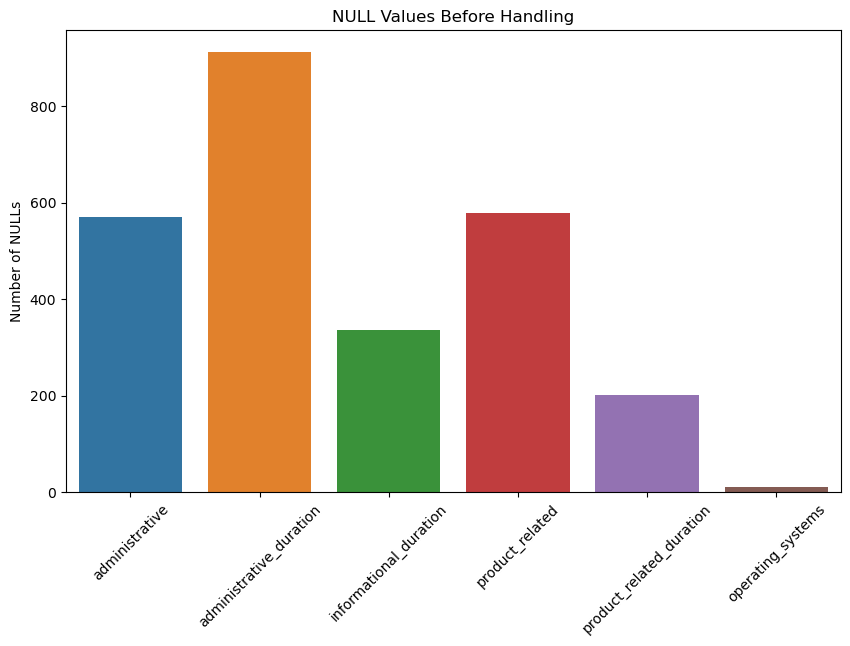

NULL Summary:
                          Null Count  Percentage
administrative                   570    4.622871
administrative_duration          912    7.396594
informational                      0    0.000000
informational_duration           336    2.725061
product_related                  579    4.695864
product_related_duration         201    1.630170
bounce_rates                       0    0.000000
exit_rates                         0    0.000000
page_values                        0    0.000000
month                              0    0.000000
operating_systems                 11    0.089213
browser                            0    0.000000
region                             0    0.000000
traffic_type                       0    0.000000
visitor_type                       0    0.000000
weekend                            0    0.000000
revenue                            0    0.000000


,Null Count,Percentage
administrative,570,4.622871
administrative_duration,912,7.396594
informational,0,0.000000
informational_duration,336,2.725061
product_related,579,4.695864
product_related_duration,201,1.630170
bounce_rates,0,0.000000
exit_rates,0,0.000000
page_values,0,0.000000
month,0,0.000000


In [5]:
    # Step 1: Check NULLs and visualize
from Plotter import Plotter


df = pd.DataFrame(customer_activity_df)
transformer = DataFrameTransform(df)

plotter = Plotter(df)
plotter.plot_nulls(before=True)
transformer.check_nulls()



DROP Operating system column 

In [6]:
transformer.check_nulls()
transformer.drop_column("operating_systems")
updated_df = df.copy()

transformerBefore = DataFrameTransform(updated_df)


NULL Summary:
                          Null Count  Percentage
administrative                   570    4.622871
administrative_duration          912    7.396594
informational                      0    0.000000
informational_duration           336    2.725061
product_related                  579    4.695864
product_related_duration         201    1.630170
bounce_rates                       0    0.000000
exit_rates                         0    0.000000
page_values                        0    0.000000
month                              0    0.000000
operating_systems                 11    0.089213
browser                            0    0.000000
region                             0    0.000000
traffic_type                       0    0.000000
visitor_type                       0    0.000000
weekend                            0    0.000000
revenue                            0    0.000000
Column 'operating_systems' has been dropped.


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   administrative            11760 non-null  Int64   
 1   administrative_duration   11418 non-null  float64 
 2   informational             12330 non-null  int64   
 3   informational_duration    11994 non-null  float64 
 4   product_related           11751 non-null  Int64   
 5   product_related_duration  12129 non-null  float64 
 6   bounce_rates              12330 non-null  float64 
 7   exit_rates                12330 non-null  float64 
 8   page_values               12330 non-null  float64 
 9   month                     12330 non-null  object  
 10  browser                   12330 non-null  category
 11  region                    12330 non-null  category
 12  traffic_type              12330 non-null  category
 13  visitor_type              12330 non-null  cate

In [8]:
# Step 3: Impute NULLs in numeric columns
transformer.impute_nulls(strategy="median")


Imputed NULL values in column 'administrative' using median.
Imputed NULL values in column 'administrative_duration' using median.
Imputed NULL values in column 'informational_duration' using median.
Imputed NULL values in column 'product_related' using median.
Imputed NULL values in column 'product_related_duration' using median.


In [9]:
df.head()
transformer.check_nulls()

NULL Summary:
                          Null Count  Percentage
administrative                     0         0.0
administrative_duration            0         0.0
informational                      0         0.0
informational_duration             0         0.0
product_related                    0         0.0
product_related_duration           0         0.0
bounce_rates                       0         0.0
exit_rates                         0         0.0
page_values                        0         0.0
month                              0         0.0
browser                            0         0.0
region                             0         0.0
traffic_type                       0         0.0
visitor_type                       0         0.0
weekend                            0         0.0
revenue                            0         0.0


,Null Count,Percentage
administrative,0,0.0
administrative_duration,0,0.0
informational,0,0.0
informational_duration,0,0.0
product_related,0,0.0
product_related_duration,0,0.0
bounce_rates,0,0.0
exit_rates,0,0.0
page_values,0,0.0
month,0,0.0


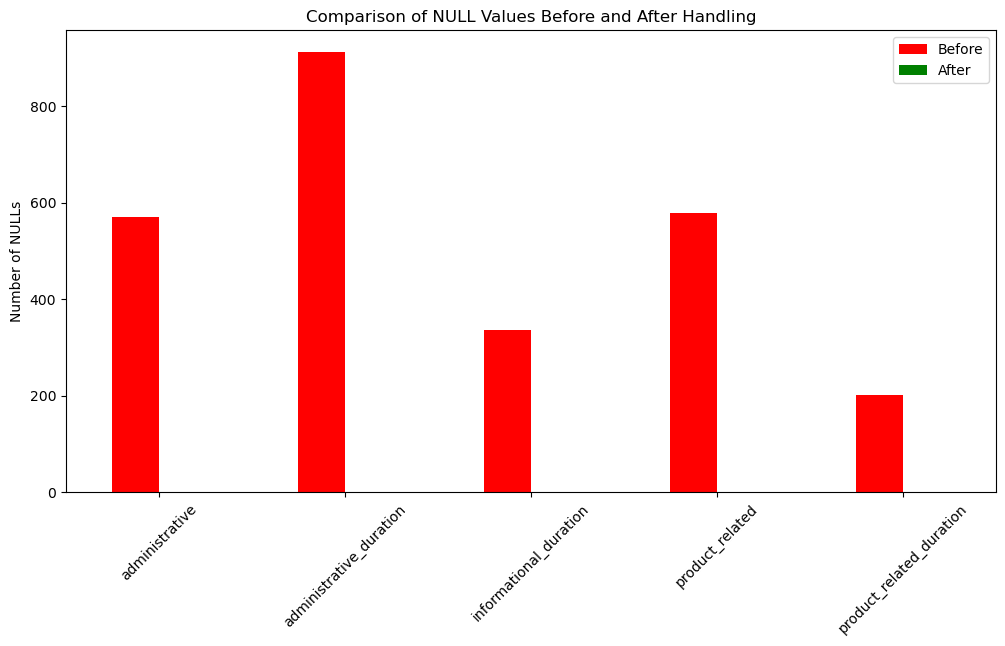

In [10]:
# Visualize the removal of NULL values
# updated_df = transformer.df
plotter = Plotter(transformerBefore.df, transformer.df)
plotter.plot_null_comparison()

MILESTONE 3 TASK 4

In [11]:
# Step 1: Identify Skewed Columns
skewed_columns = transformer.identify_skewed_columns(threshold=1.0)

Skewed columns (|skewness| > 1.0): ['administrative', 'administrative_duration', 'informational', 'informational_duration', 'product_related', 'product_related_duration', 'bounce_rates', 'exit_rates', 'page_values', 'revenue']


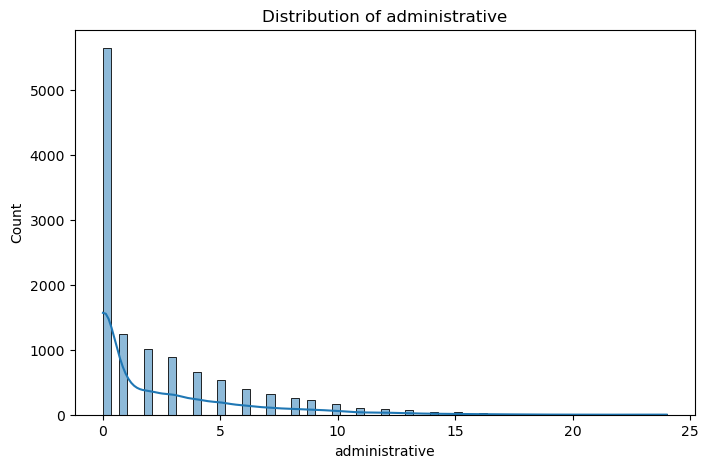

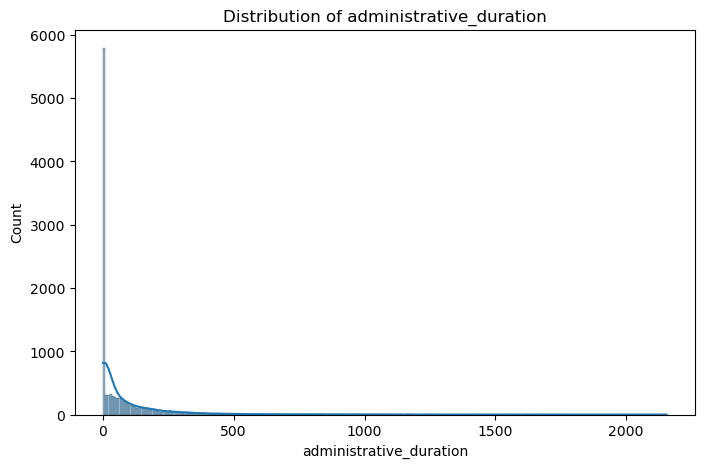

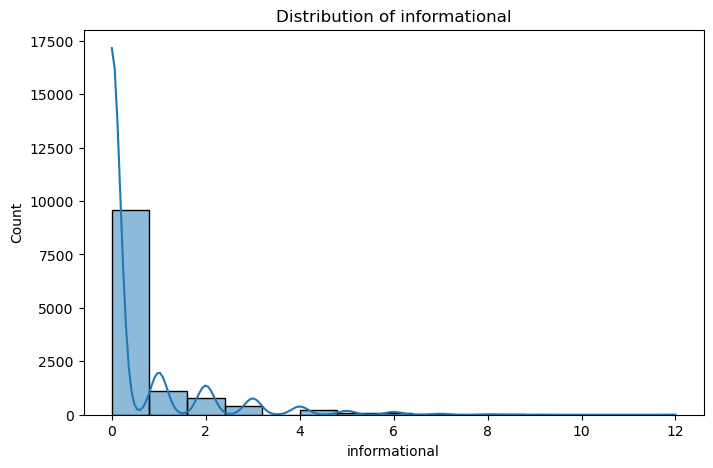

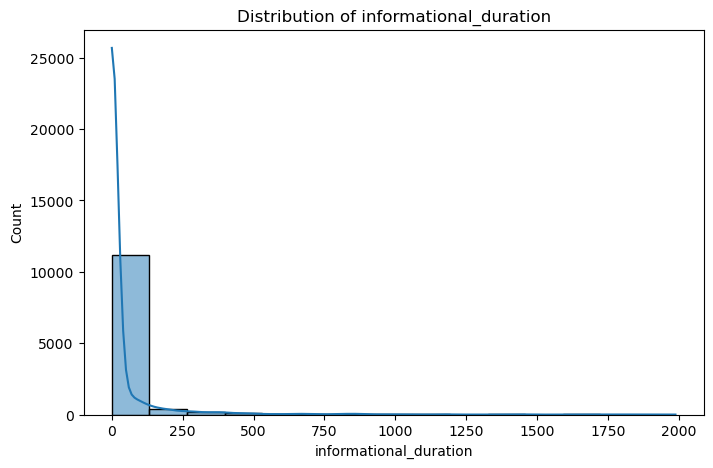

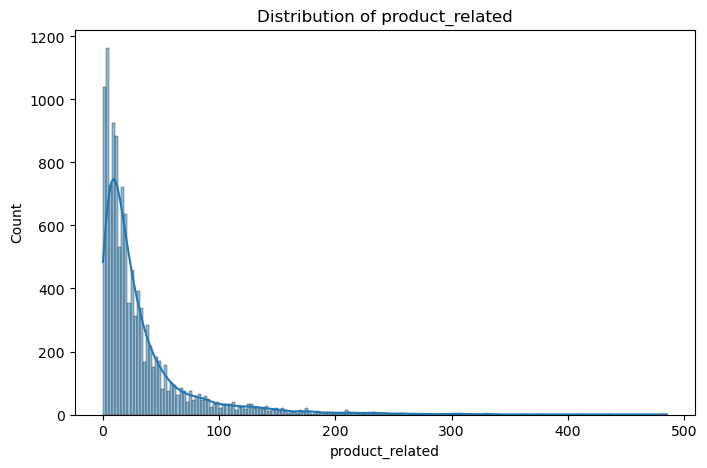

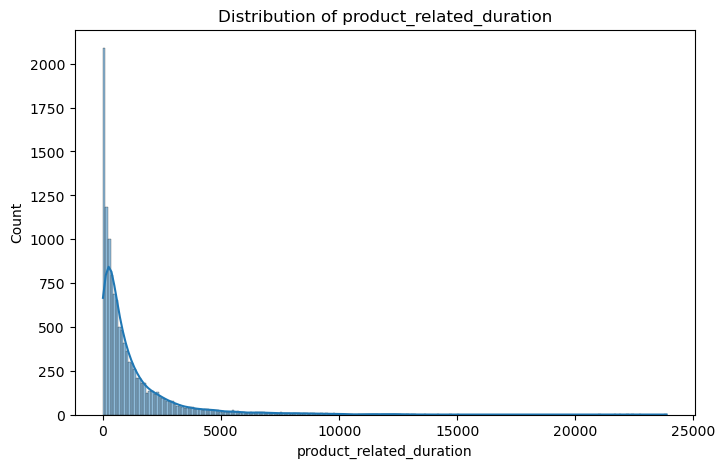

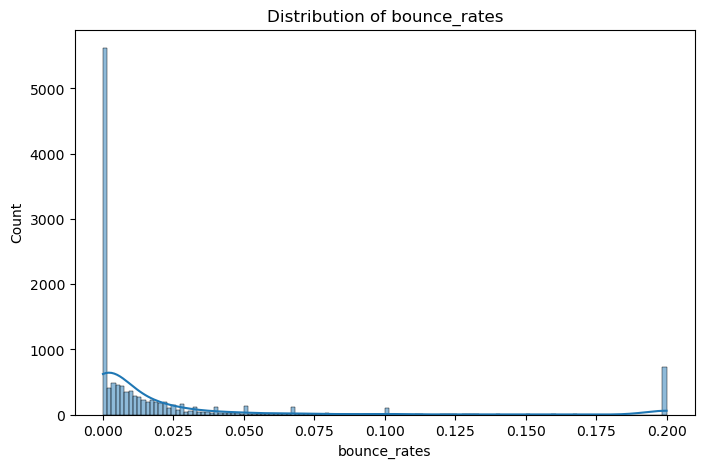

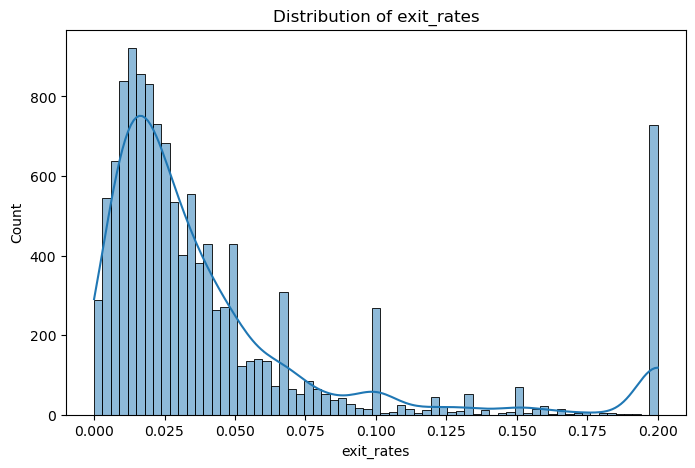

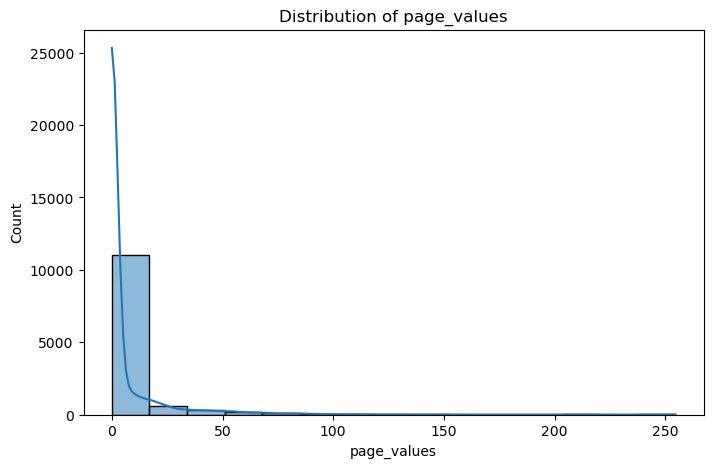

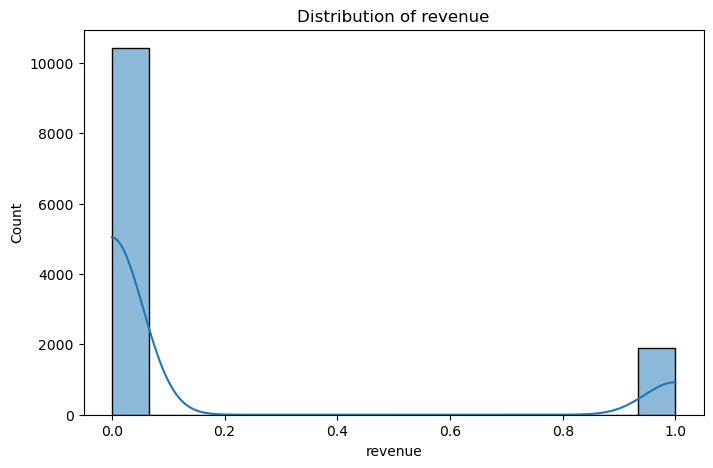

In [12]:
# Step 2: Visualize Skewed Columns
plotter.plot_distributions(*skewed_columns)

In [13]:
# Step 3: Apply Transformations
for col in skewed_columns:
    transformer.transform_skew(col, method="log")

Applied log transformation to column 'administrative'.
Applied log transformation to column 'administrative_duration'.
Applied log transformation to column 'informational'.
Applied log transformation to column 'informational_duration'.
Applied log transformation to column 'product_related'.
Applied log transformation to column 'product_related_duration'.
Applied log transformation to column 'bounce_rates'.
Applied log transformation to column 'exit_rates'.
Applied log transformation to column 'page_values'.
Applied log transformation to column 'revenue'.


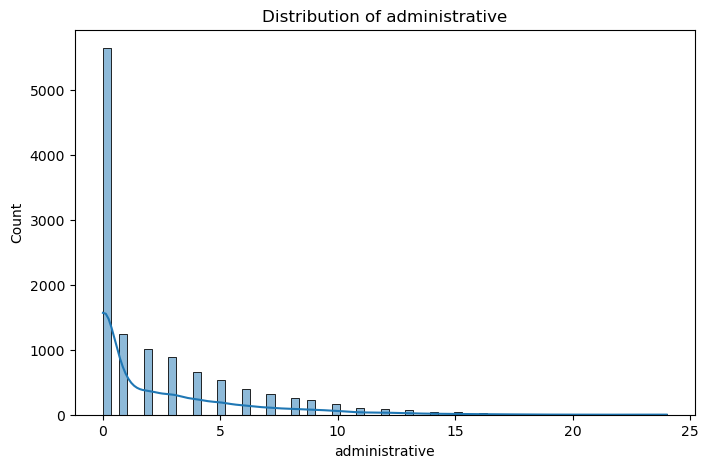

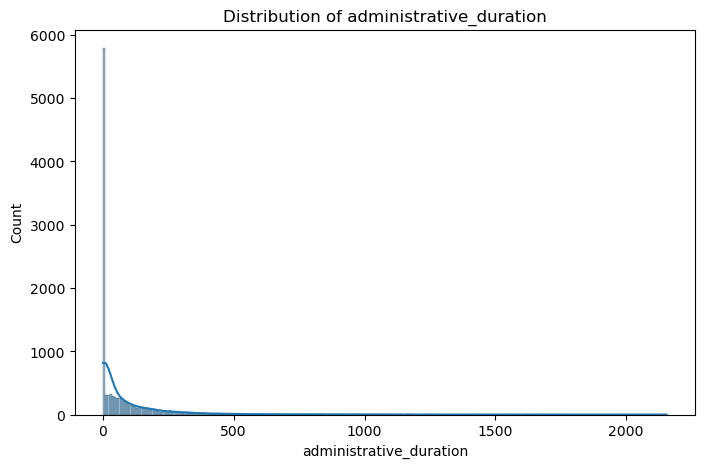

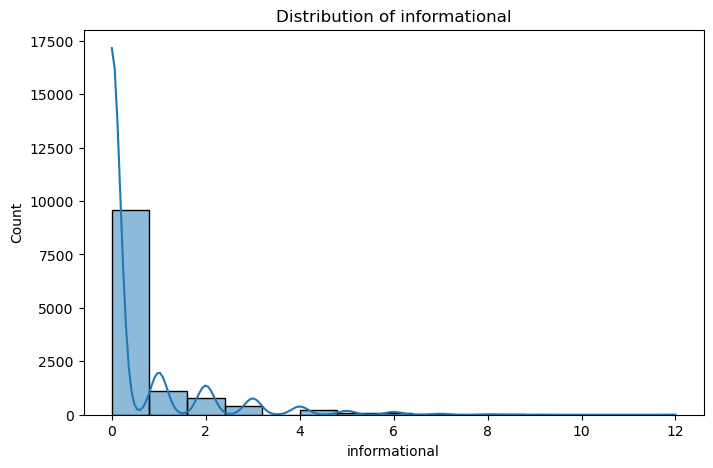

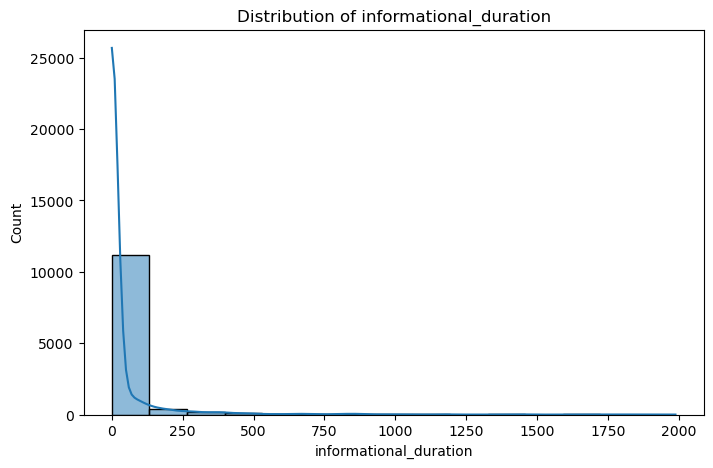

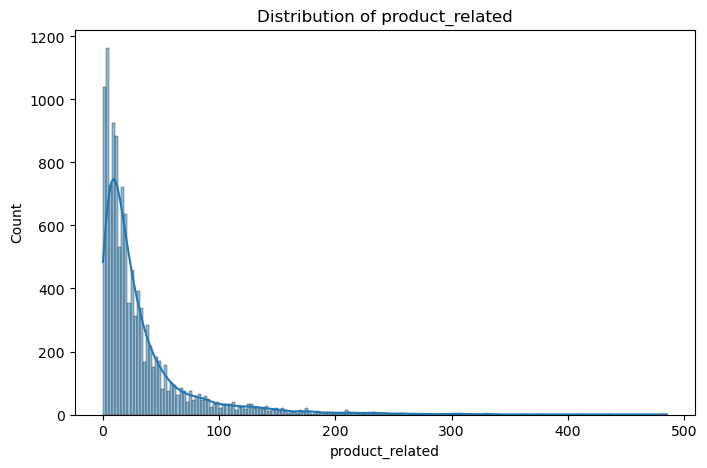

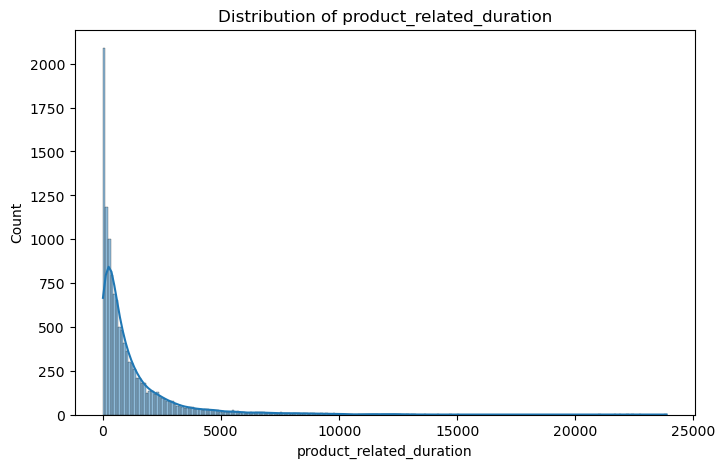

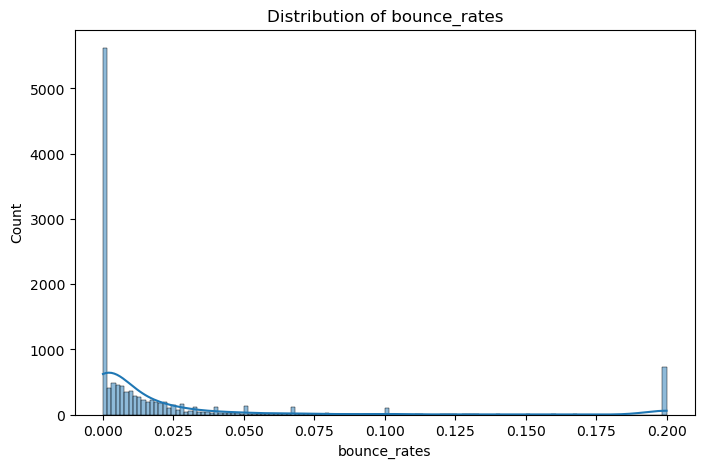

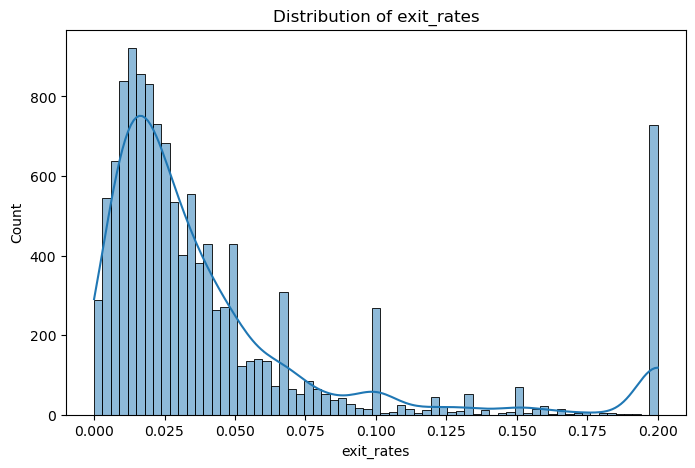

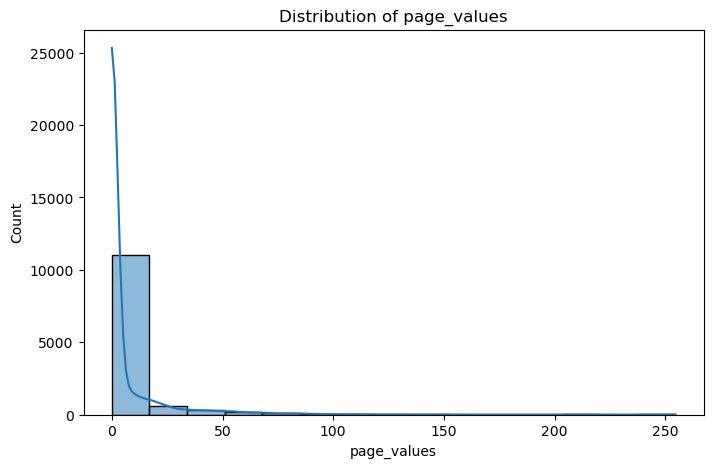

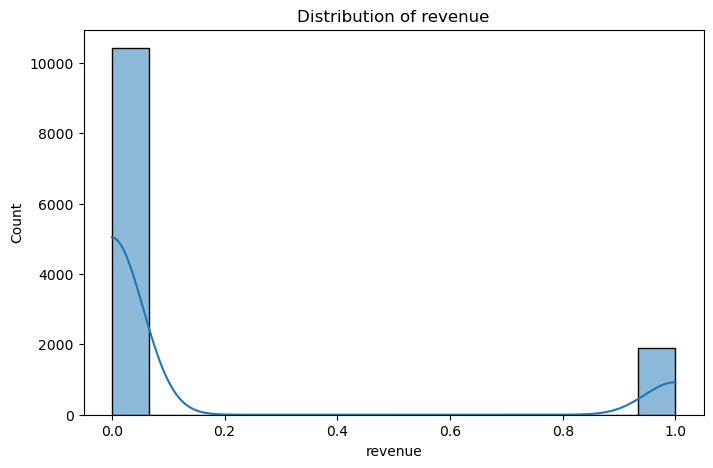

In [14]:
# Step 4: Visualize Post-Transformation
plotter.plot_distributions(*skewed_columns)

In [15]:
# Step 5: Save Transformed Data
df.to_csv("transformed_data.csv", index=False)
print("\nTransformed DataFrame saved as 'transformed_data.csv'.")


Transformed DataFrame saved as 'transformed_data.csv'.


Skipping column 'administrative' due to NaNs or infinite values.
Skipping column 'administrative_duration' due to NaNs or infinite values.


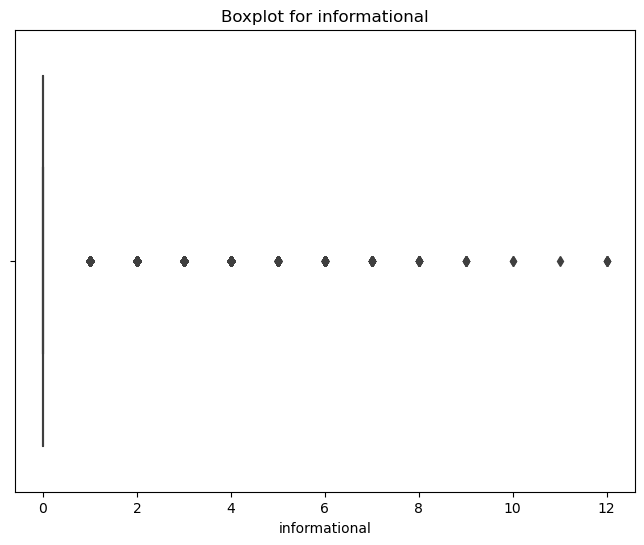

Skipping column 'informational_duration' due to NaNs or infinite values.
Skipping column 'product_related' due to NaNs or infinite values.
Skipping column 'product_related_duration' due to NaNs or infinite values.


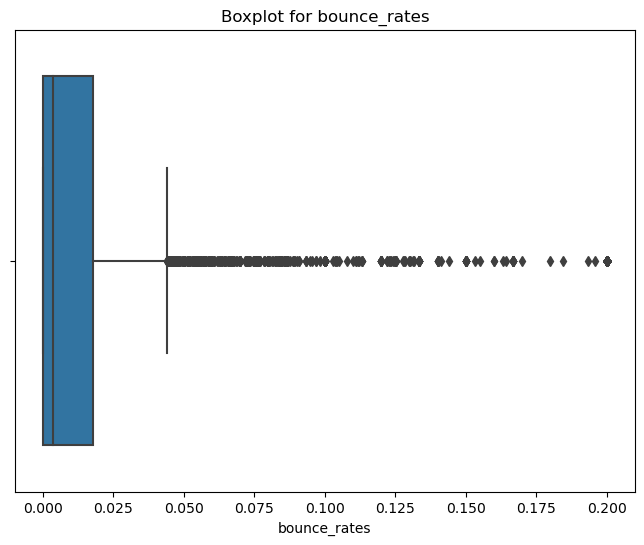

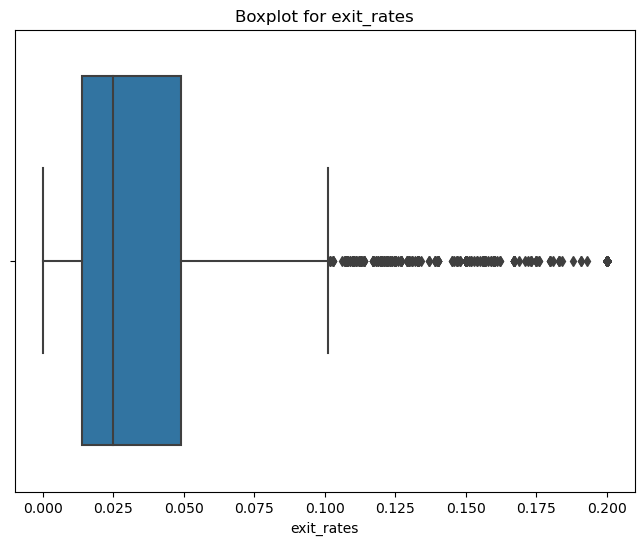

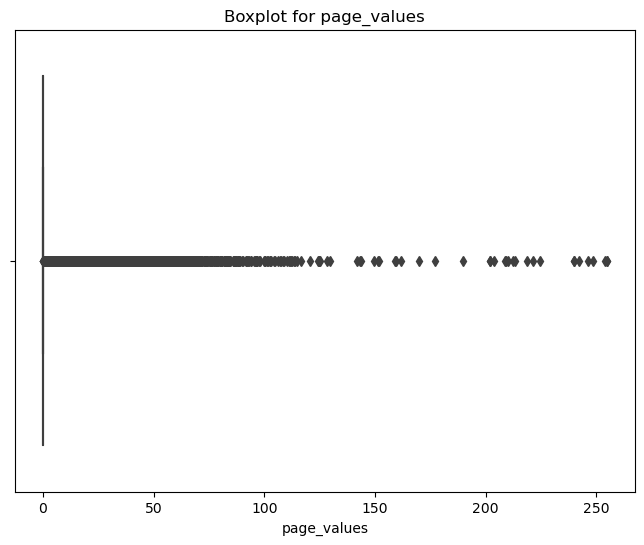

Skipping column 'weekend' due to insufficient unique values.


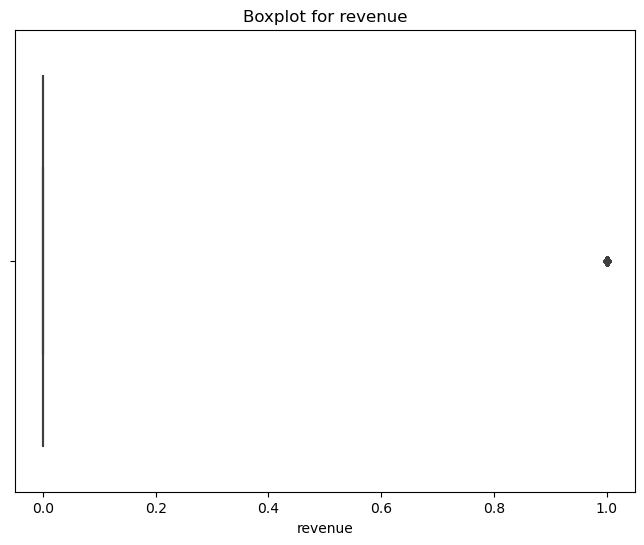

In [16]:
# Visualize potential outliers for numeric columns
numeric_columns = df.select_dtypes(include=["float64", "int64"]).columns
for column in numeric_columns:
    plotter.plot_box(column)

In [17]:
# Step 2: Detect and remove outliers
transform_instance = DataFrameTransform(df)
# Remove outliers using Z-Score method
transform_instance.remove_outliers(columns=["administrative", "informational"], method="zscore", threshold=3)

# transformer.remove_outliers("numeric_column", method="IQR")

Processed outliers in column 'administrative' using method 'zscore'.
Processed outliers in column 'informational' using method 'zscore'.


Skipping column 'administrative' due to NaNs or infinite values.
Skipping column 'administrative' due to NaNs or infinite values.
Skipping column 'administrative_duration' due to NaNs or infinite values.
Skipping column 'administrative_duration' due to NaNs or infinite values.


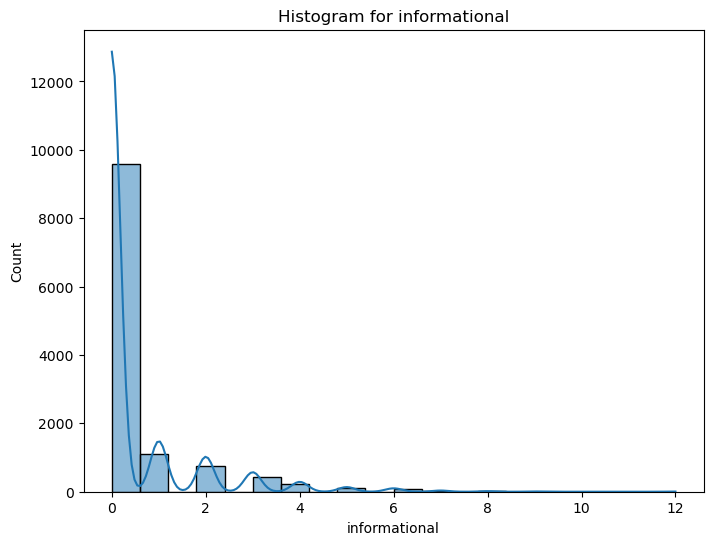

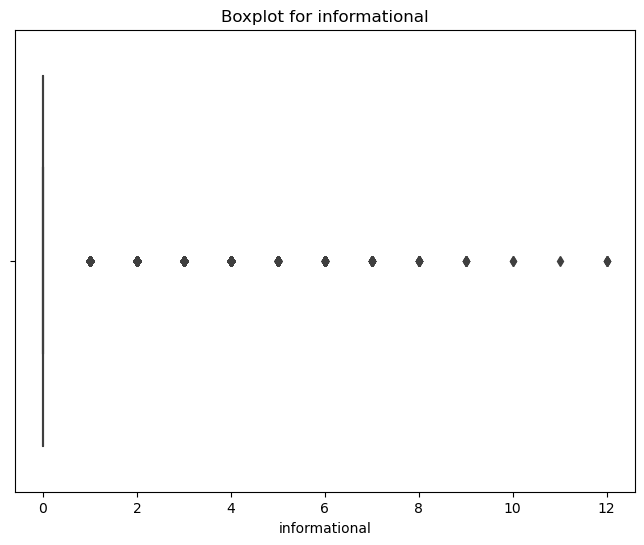

Skipping column 'informational_duration' due to NaNs or infinite values.
Skipping column 'informational_duration' due to NaNs or infinite values.
Skipping column 'product_related' due to NaNs or infinite values.
Skipping column 'product_related' due to NaNs or infinite values.
Skipping column 'product_related_duration' due to NaNs or infinite values.
Skipping column 'product_related_duration' due to NaNs or infinite values.


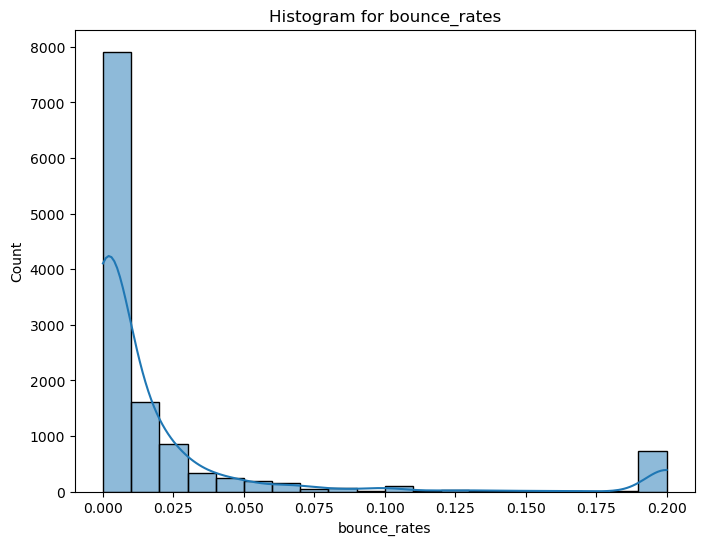

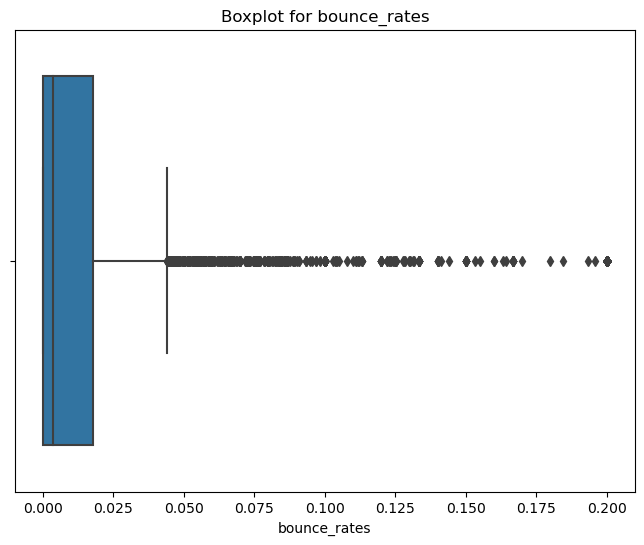

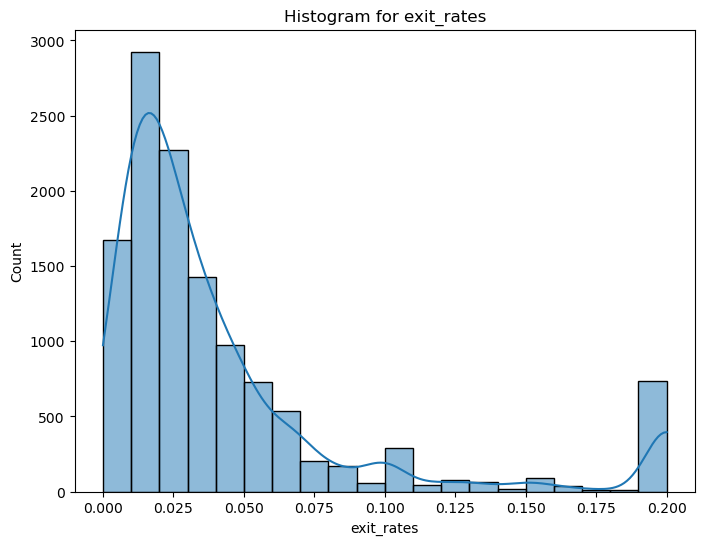

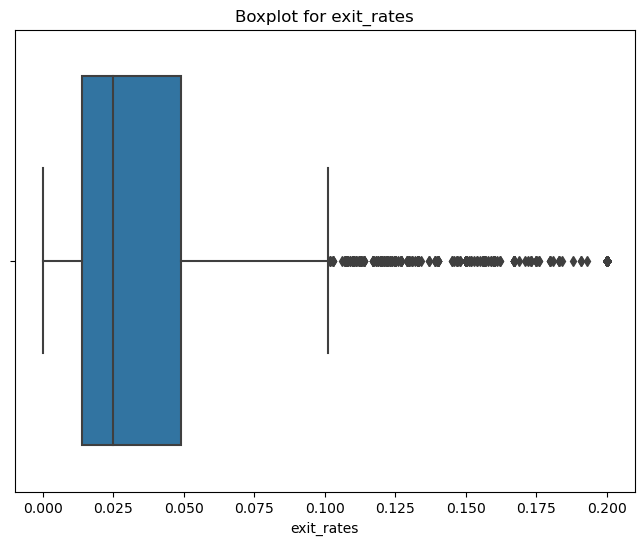

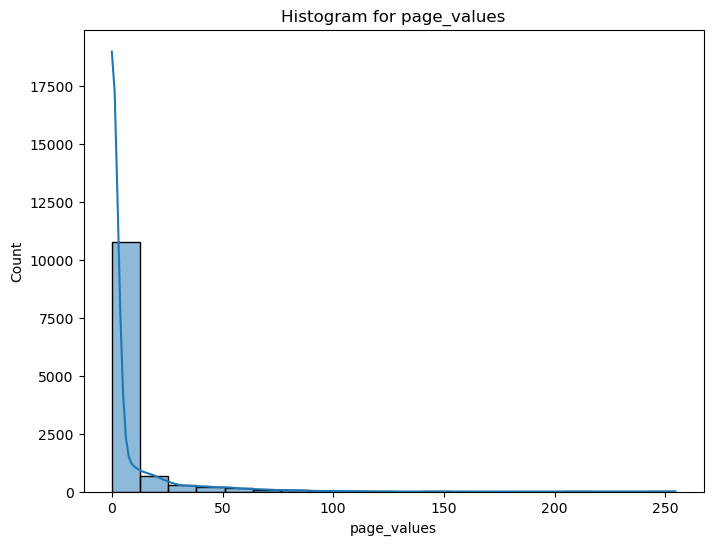

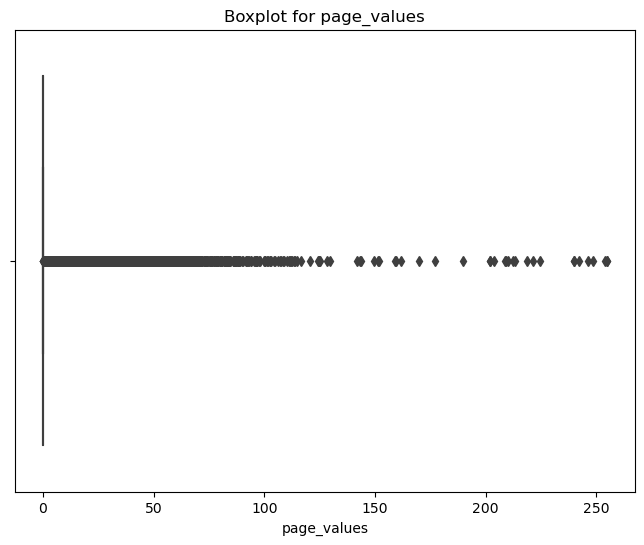

Skipping column 'weekend' due to insufficient unique values.
Skipping column 'weekend' due to insufficient unique values.


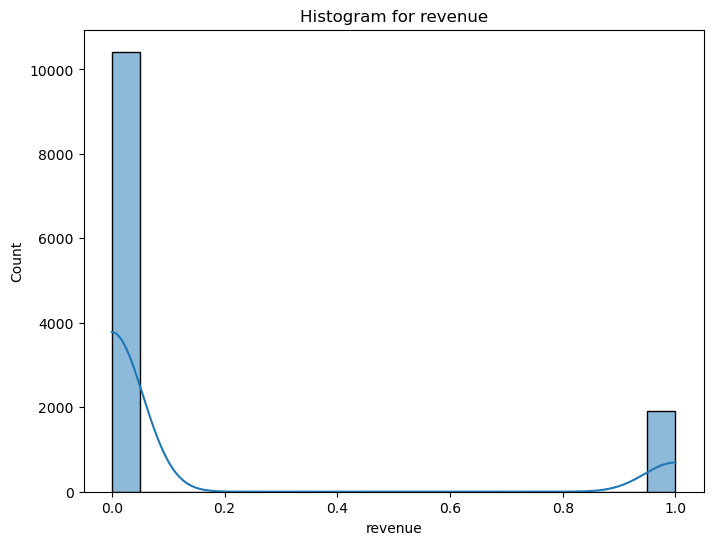

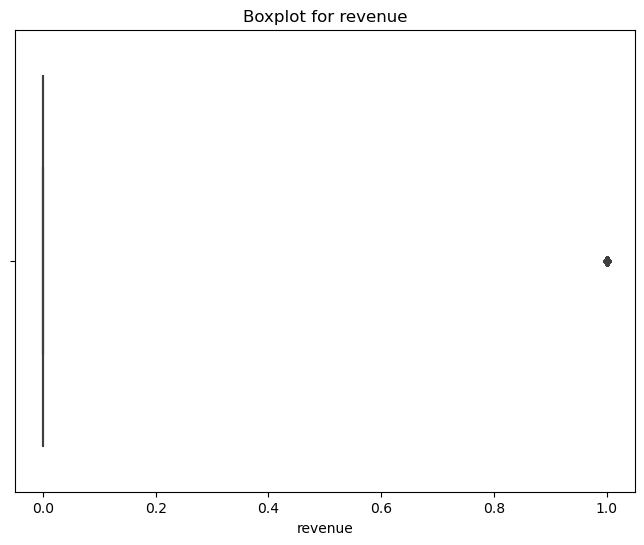

In [18]:
for column in numeric_columns:
    plotter.plot_hist(column)
    plotter.plot_box(column)

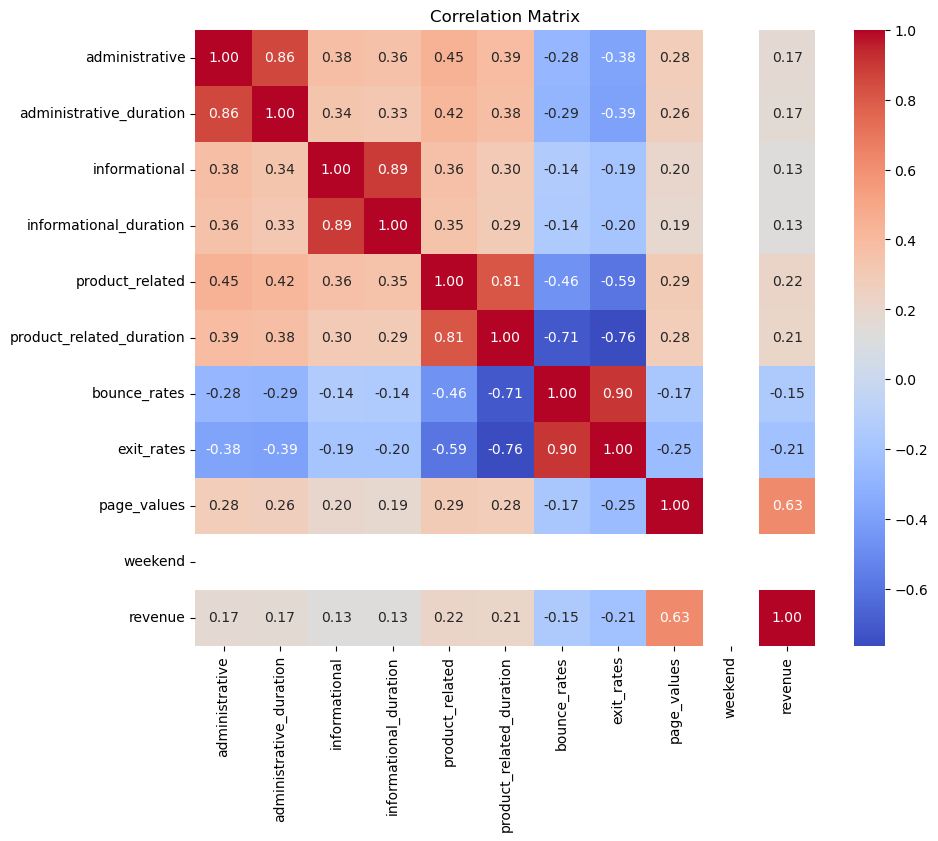

,administrative,administrative_duration,informational,informational_duration,product_related,product_related_duration,bounce_rates,exit_rates,page_values,weekend,revenue
administrative,1.000000,0.862257,0.375455,0.359860,0.445034,0.392080,-0.276474,-0.379616,0.283412,NaN,0.169408
administrative_duration,0.862257,1.000000,0.335844,0.325529,0.415125,0.378849,-0.289124,-0.392287,0.264503,NaN,0.166631
informational,0.375455,0.335844,1.000000,0.894759,0.362339,0.302032,-0.140353,-0.192670,0.199013,NaN,0.131829
informational_duration,0.359860,0.325529,0.894759,1.000000,0.349240,0.292509,-0.143932,-0.195791,0.185893,NaN,0.126374
product_related,0.445034,0.415125,0.362339,0.349240,1.000000,0.807526,-0.463798,-0.590509,0.292639,NaN,0.221078
product_related_duration,0.392080,0.378849,0.302032,0.292509,0.807526,1.000000,-0.708226,-0.761849,0.278979,NaN,0.210442
bounce_rates,-0.276474,-0.289124,-0.140353,-0.143932,-0.463798,-0.708226,1.000000,0.904608,-0.174759,NaN,-0.152052
exit_rates,-0.379616,-0.392287,-0.192670,-0.195791,-0.590509,-0.761849,0.904608,1.000000,-0.250869,NaN,-0.214365
page_values,0.283412,0.264503,0.199013,0.185893,0.292639,0.278979,-0.174759,-0.250869,1.000000,NaN,0.626006
weekend,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
# Step 1: Compute and visualize the correlation matrix
transformer.compute_correlation_matrix()

In [20]:
# Step 2-4: Remove highly correlated columns
removed_columns = transformer.remove_highly_correlated(threshold=0.9)

Removed columns due to high correlation (threshold > 0.9): ['exit_rates']


In [21]:
# Check the resulting DataFrame
print("Transformed DataFrame:")
print(transformer.df)

Transformed DataFrame:
       administrative  administrative_duration  informational  \
0        9.999995e-07             9.999995e-07   9.999995e-07   
1        9.999995e-07             9.999995e-07   9.999995e-07   
2        1.098612e+00             4.609162e+00   9.999995e-07   
3        9.999995e-07             9.999995e-07   9.999995e-07   
4        9.999995e-07             9.999995e-07   9.999995e-07   
...               ...                      ...            ...   
12325    6.931472e-01             4.905275e+00   1.609438e+00   
12326    1.791759e+00             1.945910e+00   6.931472e-01   
12327    9.999995e-07             9.999995e-07   9.999995e-07   
12328    1.791759e+00             4.595120e+00   9.999995e-07   
12329    2.197225e+00             5.501913e+00   1.098612e+00   

       informational_duration  product_related  product_related_duration  \
0                9.999995e-07         1.609438              9.999995e-07   
1                9.999995e-07         3.2958